In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline  

In [2]:
def preprocess(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask

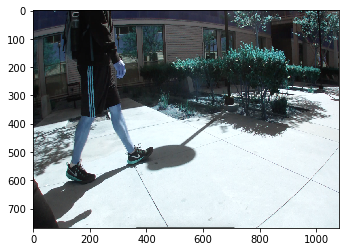

In [3]:
foot = cv2.imread('danny_foot.png')


resized_foot = cv2.resize(foot, (1080, 768))
plt.imshow(resized_foot)
plt.show()

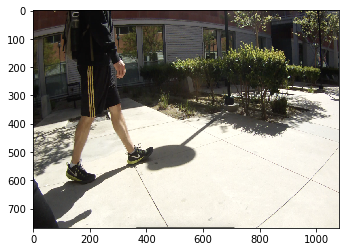

In [4]:
# convert to rgb from bgr
foot_rgb = cv2.cvtColor(resized_foot, cv2.COLOR_BGR2RGB)
plt.imshow(foot_rgb)
plt.show()

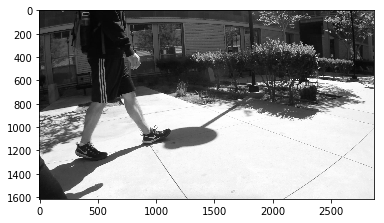

135.65370122813675

In [5]:
foot_grayscaled = cv2.cvtColor(foot, cv2.COLOR_BGR2GRAY)
plt.imshow(foot_grayscaled, cmap='gray')
plt.show()
foot_grayscaled.mean()

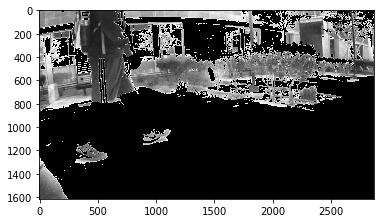

In [6]:
lower_black = np.array([0])
upper_black = np.array([64])
pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
plt.imshow(pimg1, cmap='gray')
plt.show()

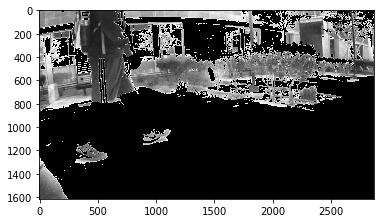

In [7]:
ret1, img1_thresh = cv2.threshold(pimg1, lower_black, upper_black, cv2.THRESH_TOZERO )
plt.imshow(img1_thresh, cmap='gray')
plt.show()

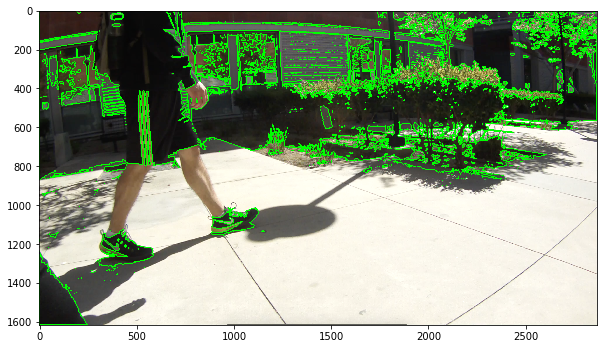

In [8]:
threshold_color = [0, 255, 0] # green
foot_copy = foot.copy()
img1_c, img1_contours, img1_heirarchy = cv2.findContours(img1_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(foot_copy, img1_contours, -1, threshold_color, 3)
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(foot_copy, cv2.COLOR_BGR2RGB) )
plt.show()

In [9]:
def filter_boxes(img_rectangle_list, filter_size=0):
    filtered_boxes = []
    for rectangle in img_rectangle_list:
        if(rectangle[2] * rectangle[3] > filter_size):
            filtered_boxes.append(rectangle)
    return filtered_boxes

def draw_rectangles(img, img_rectangle_list, x_offset=0, y_offset=0):
    for x, y, w, h in img_rectangle_list:
        cv2.rectangle(
            img,
            (x - x_offset, y - y_offset),
            ( (x + x_offset) + w, (y + y_offset) + h),
            (0, 255, 0),
            2
        )
        
# def create_all_boxes(img_contours_list): # takes in a list of contour coordinates and returns an list of boxes around contours
#     box_list = []
#     for contour in img_contours_list:
#         cv2.boundingRect(contour)
#         box_list.append(contour)
#     return box_list

def get_positive_roi(img, roi_list, x_offset=0, y_offset=0):
    positive_roi = []
    for x, y, w, h in roi_list:
        roi = img[y:y + h, x:x + w, :3]
        roi_resized = cv2.resize(roi, dimensions) # dimensions defined as (80, 80) above
        features = hog.compute(roi_resized)
        proba = svm_l.predict_proba(features.reshape(1, -1) )[0] # will produce meaningless results on very small datasets per docs
        if proba[1] > .1:
            positive_roi.append((x, y, w, h) )
    return positive_roi

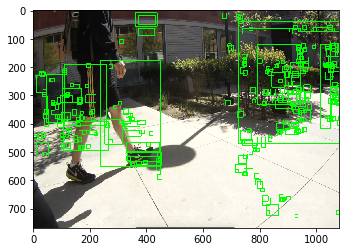

In [27]:
box_filter_size = 0
# dimensions = (1080,1080)
# this gets the rectangle, will show the x y coordinate then width and height
img1_all_boxes = [cv2.boundingRect(c) for c in img1_contours]
img1_filter_boxes = filter_boxes(img1_all_boxes, box_filter_size)
draw_rectangles(foot_rgb, img1_filter_boxes, 5, 5)
# roi_filtered_1 = get_positive_roi(foot, img1_filter_boxes)
# draw_rectangles(foot, roi_filtered_1, 5, 5)
plt.imshow(foot_rgb)
plt.show()

In [31]:
img1_filter_boxes.sort()
for i in img1_filter_boxes:
    print(i)

(0, 0, 2870, 872)
(0, 1179, 3, 2)
(0, 1248, 246, 368)
(1, 1186, 1, 1)
(2, 1239, 1, 1)
(3, 1045, 3, 1)
(5, 446, 8, 4)
(12, 1259, 2, 1)
(14, 944, 1, 1)
(15, 1269, 2, 1)
(16, 472, 34, 37)
(18, 235, 25, 50)
(18, 940, 16, 5)
(21, 441, 7, 5)
(22, 947, 13, 4)
(26, 222, 10, 4)
(29, 225, 5, 4)
(33, 862, 1, 1)
(34, 225, 4, 3)
(35, 441, 4, 4)
(35, 935, 19, 5)
(37, 506, 5, 3)
(39, 296, 3, 4)
(40, 285, 3, 8)
(40, 308, 7, 54)
(42, 863, 2, 1)
(42, 940, 2, 1)
(42, 1152, 1, 2)
(43, 369, 6, 9)
(43, 1314, 3, 4)
(44, 385, 6, 20)
(45, 354, 4, 5)
(45, 862, 9, 1)
(45, 1151, 1, 1)
(46, 933, 2, 1)
(48, 1219, 1, 1)
(50, 933, 2, 1)
(50, 1149, 1, 1)
(52, 233, 46, 159)
(52, 1064, 5, 4)
(52, 1148, 4, 2)
(52, 1321, 2, 2)
(55, 932, 7, 3)
(57, 855, 18, 6)
(58, 1142, 39, 25)
(63, 245, 2, 2)
(66, 245, 3, 3)
(66, 1343, 1, 2)
(67, 1346, 2, 2)
(69, 322, 1, 1)
(69, 325, 1, 1)
(69, 329, 1, 1)
(69, 929, 6, 3)
(71, 358, 1, 6)
(72, 1348, 1, 1)
(72, 1357, 1, 1)
(75, 329, 1, 1)
(75, 822, 7, 6)
(75, 926, 5, 2)
(75, 1354, 1, 2)
(77

(1824, 775, 7, 12)
(1830, 307, 1, 1)
(1830, 666, 110, 55)
(1832, 310, 6, 12)
(1835, 22, 1, 1)
(1835, 376, 12, 9)
(1835, 783, 3, 3)
(1836, 325, 3, 4)
(1836, 331, 2, 2)
(1837, 359, 2, 2)
(1839, 232, 4, 5)
(1839, 337, 2, 2)
(1840, 338, 4, 4)
(1842, 30, 6, 4)
(1842, 45, 1, 1)
(1842, 241, 7, 5)
(1842, 308, 13, 13)
(1842, 352, 6, 3)
(1842, 415, 10, 7)
(1843, 286, 3, 4)
(1844, 261, 6, 9)
(1844, 351, 1, 1)
(1844, 372, 4, 3)
(1844, 579, 119, 100)
(1846, 436, 12, 10)
(1846, 715, 5, 3)
(1847, 34, 1, 1)
(1847, 328, 2, 5)
(1848, 124, 6, 2)
(1848, 227, 6, 6)
(1849, 354, 1, 1)
(1850, 319, 5, 7)
(1851, 572, 5, 39)
(1853, 42, 1, 1)
(1853, 189, 13, 32)
(1853, 343, 3, 4)
(1853, 620, 3, 5)
(1855, 257, 7, 8)
(1855, 589, 3, 13)
(1855, 764, 18, 7)
(1856, 281, 4, 3)
(1856, 366, 5, 5)
(1857, 328, 1, 3)
(1858, 52, 5, 3)
(1859, 93, 3, 3)
(1859, 125, 7, 2)
(1859, 447, 4, 4)
(1861, 610, 13, 7)
(1862, 3, 1, 1)
(1862, 324, 4, 2)
(1867, 1, 5, 3)
(1867, 45, 3, 5)
(1867, 127, 4, 1)
(1870, 45, 5, 5)
(1871, 639, 6, 2)
(1

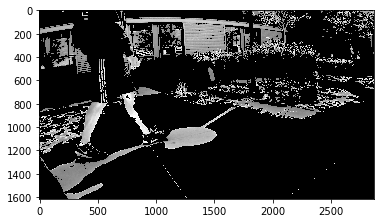

In [12]:
lower_black = np.array([65])
upper_black = np.array([129])
pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
plt.imshow(pimg1, cmap='gray')
plt.show()

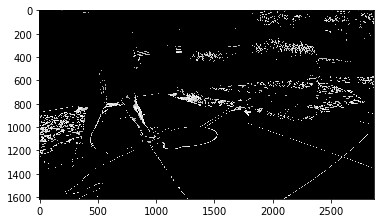

In [13]:
lower_black = np.array([130])
upper_black = np.array([194])
pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
plt.imshow(pimg1, cmap='gray')
plt.show()

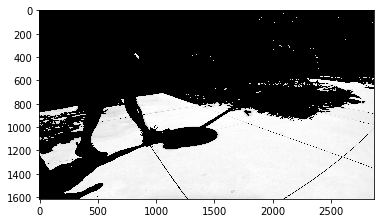

In [14]:
lower_black = np.array([195])
upper_black = np.array([255])
pimg1, mask = preprocess(foot_grayscaled, [lower_black, upper_black])
plt.imshow(pimg1, cmap='gray')
plt.show()

roi


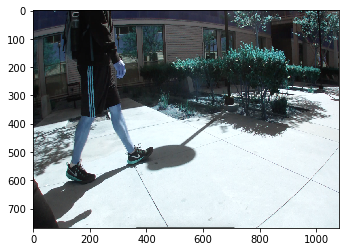

In [15]:
# Load two images
# img1 = cv2.imread('.jpg')
# img2 = cv2.imread('opencv-logo.png')
# I want to put logo on top-left corner, So I create a ROI
img1 = resized_foot
img2 = foot_rgb
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
print("roi")
plt.imshow(roi)
plt.show()

# cv2.waitKey(0)
# cv2.destroyAllWindows()

img2gray


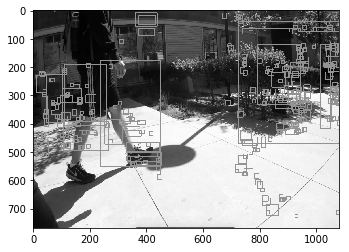

In [16]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
print("img2gray")
plt.imshow(img2gray, cmap='gray')
plt.show()



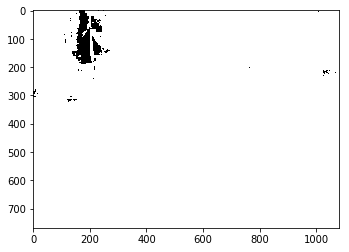

In [17]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap='gray')
plt.show()



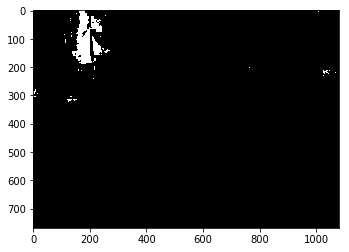

In [18]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray')
plt.show()



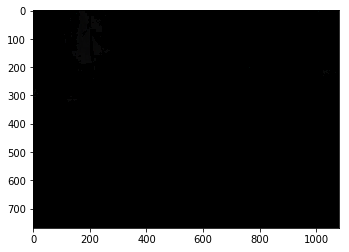

In [19]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.imshow(img1_bg)
plt.show()



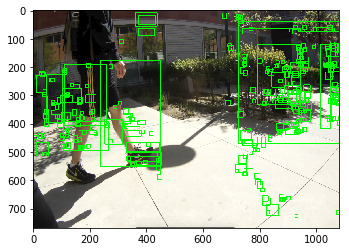

In [20]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
plt.imshow(img2_fg)
plt.show()



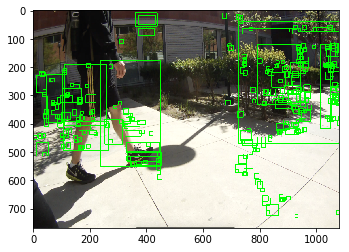

In [21]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
# cv2.imshow('res',img1)
plt.imshow(img1)
plt.show()